In [2]:
import numpy as np
import math
import random
from matplotlib import pyplot as plt

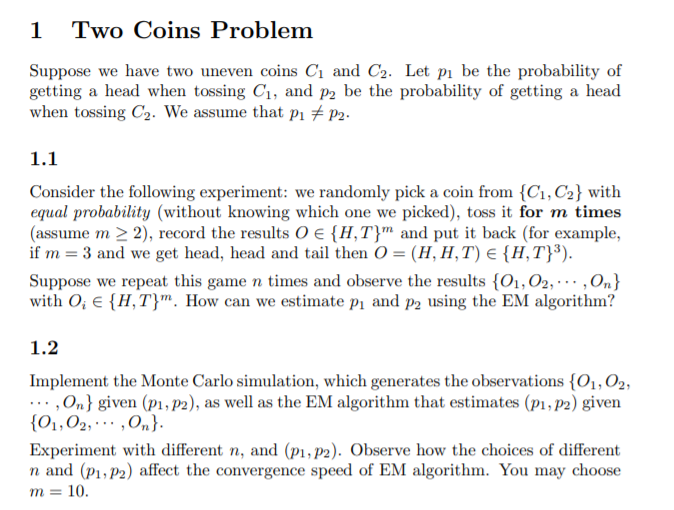

In [36]:
def generate_observations(p1,p2,n,m):
    
    answer = []
    
    for j in range(n):
        p_coin = np.random.random_sample()
        if p_coin <0.5:
            probablity_head = p1 
        else:
            probablity_head = p2
        
        random_p =  np.random.uniform(low = 0, high = 1, size = (m,))
        observations = []
        for i in random_p:
            if i < probablity_head : 
                observations.append('H')

            else : 
                observations.append('T')
            
        answer.append(observations)
    
    return answer

In [145]:
def EM_algorithm(obsv,m):
    
    """ This function computes the probablities of getting heads by the 2 coins. It accepts one parameter obsv : a list of list
    containing 'H' OR 'T'  and returns a tuple containing the two probablities"""
    
    # Generating random probablities for initialization
    p1 = np.random.random_sample()
    p2 = np.random.random_sample()
    n = len(obsv)
    w1 = np.zeros(n)
    w2 = np.zeros(n)
    ans = 0
    p_in_m = []
    
    for i in obsv:
        nh = len([j for j in i if j == 'H'])
        p_in_m.append(float(nh/m))
    
    ph_in_m = np.array(p_in_m)
    
    while (True) :
        
        c = 0
          
        # Updating weights 
        for i in obsv :
            nh = len([j for j in i if j == 'H'])
            w1[c] = (p1 ** nh) * ((1 - p1) ** (m - nh))
            w2[c] = (p2 ** nh) * ((1 - p2) ** (m - nh))
            sumw = w1[c] + w2[c]
            w1[c] = w1[c]/sumw
            w2[c] = w2[c]/sumw
            c += 1 
 
        # Normalising weights
        w1_sum = np.sum(w1)
        w2_sum = np.sum(w2)
        
        for i in range(n):
            w1[i] = w1[i] / w1_sum
            w2[i] = w2[i] / w2_sum
            
        
        
        # storing p values of previous iteration
        p1_prev = p1
        p2_prev = p2
        
        
        # Computing p values for current iteratiom
        p1 = np.dot(w1,ph_in_m)
        p2 = np.dot(w2,ph_in_m)
        
        
        # Checking Convergence 
        if ( abs(p1_prev - p1) < 0.000001 ) & ( abs(p2_prev - p2) < 0.000001 ) :
            ans = (p1,p2)
            break
            
    return ans
        
        
        

In [146]:
observation1 = generate_observations(0.8,0.4,1000,10)

In [147]:
EM_algorithm(observation1,10)

(0.8034225321594857, 0.3952882734461045)